# Machine learning for the diagnosis of pancreatic cancer
#### Rubén Cuervo

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import warnings
warnings.filterwarnings("ignore")

## All algorithms trial function

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

def try_all(X_train,y_train):
  knn=KNeighborsClassifier()
  xgb=XGBClassifier(random_state=1)
  rf=RandomForestClassifier(random_state=1)
  svc=SVC()
  nb=GaussianNB()
  lr=LogisticRegression()
  scores_knn = np.mean(cross_val_score(knn, X_train,y_train, cv=5))*100
  scores_xgb = np.mean(cross_val_score(xgb, X_train,y_train, cv=5))*100
  scores_rf = np.mean(cross_val_score(rf, X_train,y_train, cv=5))*100
  scores_svc = np.mean(cross_val_score(svc, X_train,y_train, cv=5))*100
  scores_nb = np.mean(cross_val_score(nb, X_train,y_train, cv=5))*100
  scores_lr = np.mean(cross_val_score(lr, X_train,y_train, cv=5))*100
  dic={"KNN":scores_knn,"XGB":scores_xgb,"RF":scores_rf,"SVC":scores_svc,"NB":scores_nb,"LR":scores_lr}
  return sorted(dic.items(), key=operator.itemgetter(1),reverse=True)

## Importing the dataset

In [3]:
data = pd.read_csv('Data/Debernardi et al 2020 data.csv')
information=pd.read_csv('Data/Debernardi et al 2020 documentation.csv')
data

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.467030,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.366000,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.579000,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.540000,41.088000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,S549,Cohort2,BPTB,68,M,3,IV,NaN,NaN,0.52026,7.058209,156.241000,525.178000,NaN
586,S558,Cohort2,BPTB,71,F,3,IV,NaN,NaN,0.85956,8.341207,16.915000,245.947000,NaN
587,S560,Cohort2,BPTB,63,M,3,IV,NaN,NaN,1.36851,7.674707,289.701000,537.286000,NaN
588,S583,Cohort2,BPTB,75,F,3,IV,NaN,NaN,1.33458,8.206777,205.930000,722.523000,NaN


In [4]:
information

,Column name,Original column name,Details
0,sample_id,Sample ID,Unique string identifying each subject
1,patient_cohort,Patient's Cohort,"Cohort 1, previously used samples; Cohort 2, ..."
2,sample_origin,Sample Origin,"BPTB: Barts Pancreas Tissue Bank, London, UK; ..."
3,age,Age,Age in years
4,sex,Sex,"M = male, F = female"
5,diagnosis,"Diagnosis (1=Control, 2=Benign, 3=PDAC)","1 = control (no pancreatic disease), 2 = benig..."
6,stage,Stage,"For those with pancratic cancer, what stage wa..."
7,benign_sample_diagnosis,Benign Samples Diagnosis,"For those with a benign, non-cancerous diagnos..."
8,plasma_CA19_9,Plasma CA19-9 U/ml,Blood plasma levels of CA 19–9 monoclonal anti...
9,creatinine,Creatinine mg/ml,Urinary biomarker of kidney function


## Data exploration

In [5]:
data.describe

<bound method NDFrame.describe of     sample_id patient_cohort sample_origin  age sex  diagnosis stage  \
0          S1        Cohort1          BPTB   33   F          1   NaN   
1         S10        Cohort1          BPTB   81   F          1   NaN   
2        S100        Cohort2          BPTB   51   M          1   NaN   
3        S101        Cohort2          BPTB   61   M          1   NaN   
4        S102        Cohort2          BPTB   62   M          1   NaN   
..        ...            ...           ...  ...  ..        ...   ...   
585      S549        Cohort2          BPTB   68   M          3    IV   
586      S558        Cohort2          BPTB   71   F          3    IV   
587      S560        Cohort2          BPTB   63   M          3    IV   
588      S583        Cohort2          BPTB   75   F          3    IV   
589      S590        Cohort1          BPTB   74   M          3    IV   

    benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1       REG1B  \
0                    

In [6]:
# Encoding of sex
data['sex'] = data['sex'].astype(str).map({'M': 0,'F': 1})

In [7]:
# Checking the number of NAs
for i in data.columns:
  print(i, " has ->",data[i].isna().sum(), "NAs")

sample_id  has -> 0 NAs
patient_cohort  has -> 0 NAs
sample_origin  has -> 0 NAs
age  has -> 0 NAs
sex  has -> 0 NAs
diagnosis  has -> 0 NAs
stage  has -> 391 NAs
benign_sample_diagnosis  has -> 382 NAs
plasma_CA19_9  has -> 240 NAs
creatinine  has -> 0 NAs
LYVE1  has -> 0 NAs
REG1B  has -> 0 NAs
TFF1  has -> 0 NAs
REG1A  has -> 284 NAs


#### Is the data balanced?

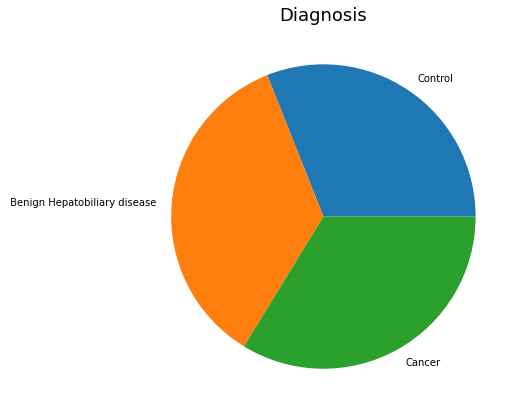

In [8]:
labels=['Control', ' Benign Hepatobiliary disease','Cancer']
pie_data=[data['diagnosis'].tolist().count(1),data['diagnosis'].tolist().count(2),data['diagnosis'].tolist().count(3)]
fig = plt.figure(figsize =(10, 7))
plt.title("Diagnosis",size=18)
plt.pie(pie_data, labels = labels)
plt.show()

Yes, it is.

#### How is the age distributed?

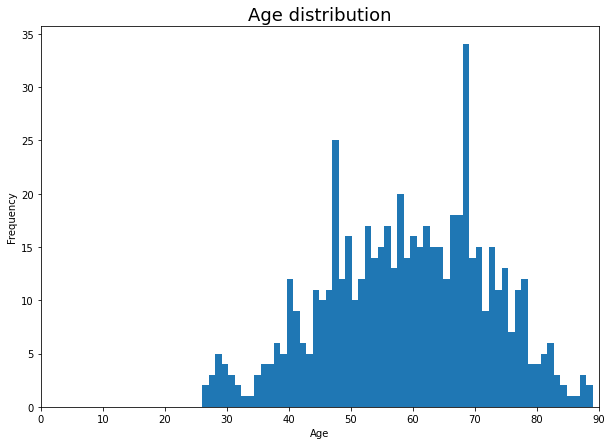

In [9]:
plt.figure(1,figsize =(10, 7))
plt.hist(data['age'], bins=60)
plt.xlim([0,90])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution",size=18)
plt.show()

Patients tend to be old.

#### Is the sex unbalanced?

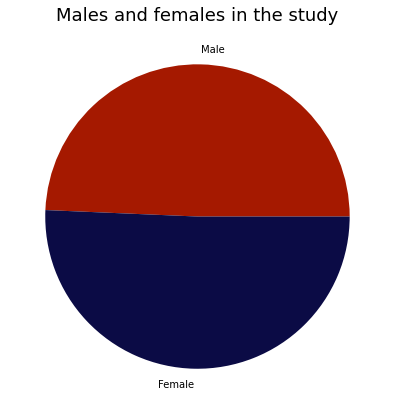

In [10]:
labels=['Male', 'Female']
pie_data=[data['sex'].tolist().count(0),data['sex'].tolist().count(1)]
fig = plt.figure(figsize =(10, 7))
plt.title("Males and females in the study",size=18)
plt.pie(pie_data, labels = labels,colors=["#A51900","#0B0B45"])
plt.show()

#### Relationship age - cancer

In [11]:
data[['age', 'diagnosis']].groupby(['diagnosis'], as_index=False).mean().sort_values(by='diagnosis')

,diagnosis,age
0,1,56.333333
1,2,54.701923
2,3,66.180905


Older people have more cancer.

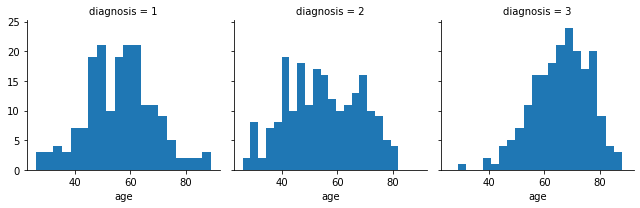

In [12]:
sns.FacetGrid(data, col='diagnosis').map(plt.hist, 'age', bins=20)
plt.show()

Cancer group is more displaced to the right.

#### Relationship patient cohort - diagnosis

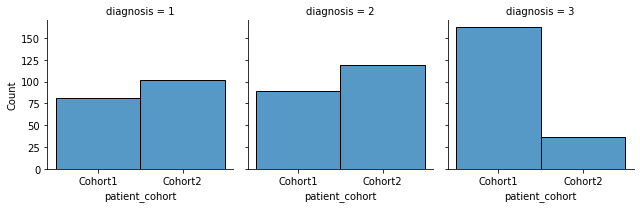

In [13]:
sns.displot(data, x="patient_cohort", col="diagnosis",binwidth=3, height=3, facet_kws=dict(margin_titles=True))
plt.show()

Cohort 1 presents more patients with cancer. This can make our algorithm take wrong conclusions.

#### Relationship sample origin - diagnosis

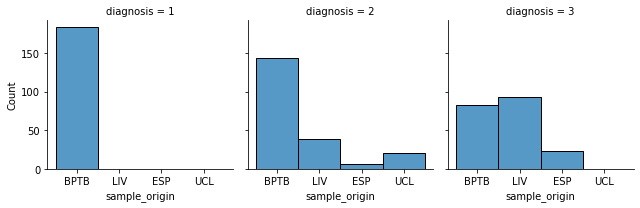

In [14]:
sns.displot(data, x="sample_origin", col="diagnosis",binwidth=3, height=3, facet_kws=dict(margin_titles=True))
plt.show()

All the control samples come from BPTB (Barts Pancreas Tissue Bank). This can infuenciate the results.

In [15]:
data = data.drop(['sample_origin','patient_cohort'], 1)

#### Relationship biomarkers - diagnosis

In [16]:
data[['plasma_CA19_9','creatinine','LYVE1','REG1B','TFF1','REG1A',
      'diagnosis']].groupby(['diagnosis'], as_index=False).mean().sort_values(by='diagnosis')

,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,1,8.749569,0.797633,1.212887,41.327901,169.024140,227.871886
1,2,61.785741,0.847929,2.084612,64.174510,448.256897,547.458092
2,3,1476.154733,0.916281,5.788567,226.308587,1148.611527,1138.323721


People with cancer have more CA19_9, creatinine, LYVE1, REG1B, TFF1	and REG1A.

##### Plot of the biomarkers without NA

<Figure size 720x504 with 0 Axes>

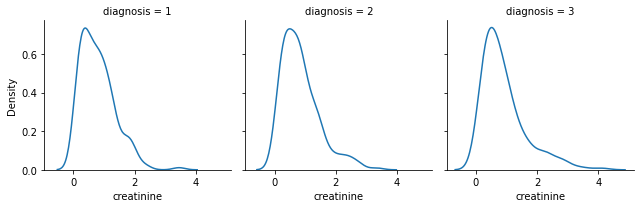

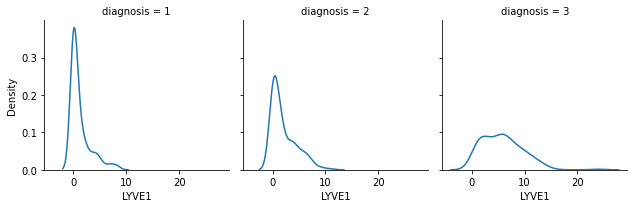

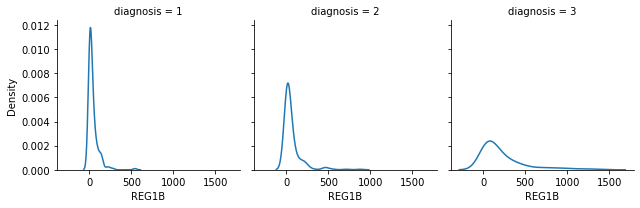

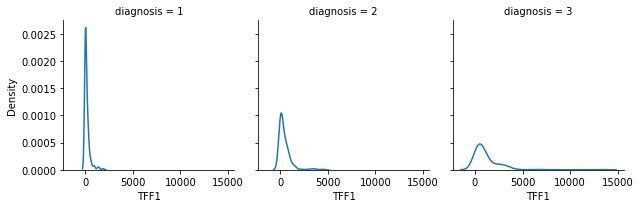

In [17]:
fig = plt.figure(figsize =(10, 7))
sns.FacetGrid(data, col='diagnosis').map(sns.kdeplot, 'creatinine')
sns.FacetGrid(data, col='diagnosis').map(sns.kdeplot, 'LYVE1')
sns.FacetGrid(data, col='diagnosis').map(sns.kdeplot, 'REG1B')
sns.FacetGrid(data, col='diagnosis').map(sns.kdeplot, 'TFF1')
plt.show()

##### Plot of the biomarkers with NA

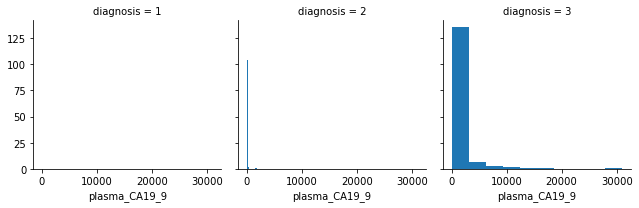

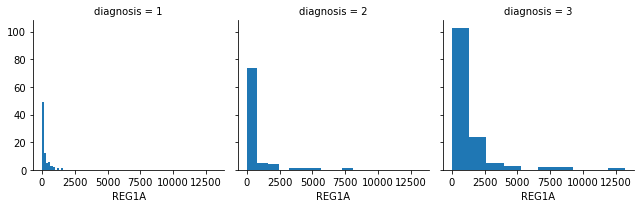

In [18]:
sns.FacetGrid(data, col='diagnosis').map(plt.hist, 'plasma_CA19_9')
sns.FacetGrid(data, col='diagnosis').map(plt.hist, 'REG1A')
plt.show()

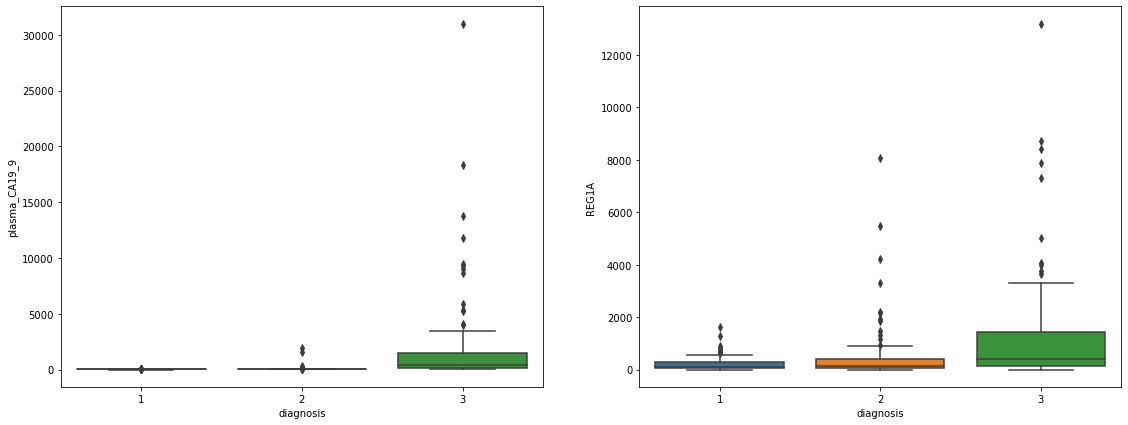

In [19]:
plt.figure(figsize =(19, 7))
plt.subplot(1,2,1)
sns.boxplot(x='diagnosis', y='plasma_CA19_9', data=data)
plt.subplot(1,2,2)
sns.boxplot(x='diagnosis', y='REG1A', data=data)
plt.show()

#### Extracting biomarkers info

In [20]:
data.describe(percentiles=[.25, .5,.75])

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
count,590.000000,590.000000,590.000000,350.000000,590.000000,590.000000,590.000000,590.000000,306.000000
mean,59.079661,0.506780,2.027119,654.002944,0.855383,3.063530,111.774090,597.868722,735.281222
std,13.109520,0.500378,0.804873,2430.317642,0.639028,3.438796,196.267110,1010.477245,1477.247724
min,26.000000,0.000000,1.000000,0.000000,0.056550,0.000129,0.001104,0.005293,0.000000
25%,50.000000,0.000000,1.000000,8.000000,0.373230,0.167179,10.757216,43.961000,80.692000
50%,60.000000,1.000000,2.000000,26.500000,0.723840,1.649862,34.303353,259.873974,208.538500
75%,69.000000,1.000000,3.000000,294.000000,1.139482,5.205037,122.741013,742.736000,649.000000
max,89.000000,1.000000,3.000000,31000.000000,4.116840,23.890323,1403.897600,13344.300000,13200.000000


## Code implementation

### First trial without using plasma_CA19_9 and REG1A
We first eliminate sample id, cancer stage, the diagnosis when the sample is benign and plasma_CA19_9 and REG1A.

In [21]:
data_1 = data.drop(['sample_id','stage','benign_sample_diagnosis','plasma_CA19_9','REG1A'], 1)
data_1["diagnosis"]=data_1["diagnosis"].replace(1, 0) # Changing labels for ML --> 0
data_1["diagnosis"]=data_1["diagnosis"].replace(2, 1) # Changing labels for ML --> 1
data_1["diagnosis"]=data_1["diagnosis"].replace(3, 2) # Changing labels for ML --> 2
data_1

,age,sex,diagnosis,creatinine,LYVE1,REG1B,TFF1
0,33,1,0,1.83222,0.893219,52.948840,654.282174
1,81,1,0,0.97266,2.037585,94.467030,209.488250
2,51,0,0,0.78039,0.145589,102.366000,461.141000
3,61,0,0,0.70122,0.002805,60.579000,142.950000
4,62,0,0,0.21489,0.000860,65.540000,41.088000
...,...,...,...,...,...,...,...
585,68,0,2,0.52026,7.058209,156.241000,525.178000
586,71,1,2,0.85956,8.341207,16.915000,245.947000
587,63,0,2,1.36851,7.674707,289.701000,537.286000
588,75,1,2,1.33458,8.206777,205.930000,722.523000


In [22]:
x1=data_1.drop(['diagnosis'], 1)
y1=data_1['diagnosis']
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, random_state=44,test_size=0.1)
print("X_train shape: {}".format(X_train1.shape))
print("y_train shape: {}".format(y_train1.shape))
print("X_test shape: {}".format(X_test1.shape))
print("y_test shape: {}".format(y_test1.shape))
# Scaling train and test in the same way
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

X_train shape: (531, 6)
y_train shape: (531,)
X_test shape: (59, 6)
y_test shape: (59,)


We first try all the methods at once.

In [23]:
try_all(X_train1,y_train1)

[('RF', 63.26573796508552),
 ('LR', 61.00687709398696),
 ('XGB', 60.62775524598837),
 ('SVC', 59.869511549991174),
 ('KNN', 59.686122377005816),
 ('NB', 55.17898077940397)]

#### Logistic regression

In [24]:
#Convert to dictionary
hyperparameters_lr = dict(penalty= ['l1', 'l2', 'elasticnet', 'none'], 
                          solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
#Use GridSearch
lr_try = GridSearchCV(LogisticRegression(random_state=1), hyperparameters_lr, cv=10)
#Fit the model
best_model_lr = lr_try.fit(X_train1, y_train1)
print('Best penalty:', best_model_lr.best_estimator_.get_params()['penalty'])
print('Best solver:', best_model_lr.best_estimator_.get_params()['solver'])

Best penalty: none
Best solver: newton-cg


In [25]:
lr_def = LogisticRegression(penalty='none',solver='newton-cg',random_state=1)
lr_def .fit(X_train1, y_train1)
Y_pred_lr_def  = lr_def .predict(X_test1)
acc_lr_def  = round(lr_def.score(X_test1, y_test1) * 100, 2)
scores = cross_val_score(lr_def, X_train1,y_train1, cv=5)
print(scores)
print("Mean accuracy: ",round(np.mean(scores),3))

[0.6635514  0.69811321 0.62264151 0.53773585 0.55660377]
Mean accuracy:  0.616


#### Random forest

Best number of estimators: 19
Best minimum samples split: 11


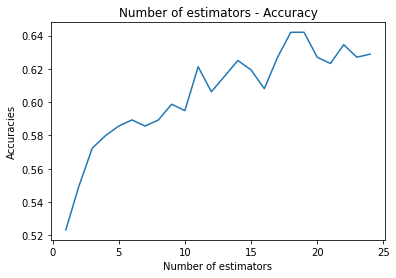

In [26]:
#Hyperparameters dictionary
hyperparameters = dict(n_estimators=[15,16,17,18,19,20,21,22,23,24,25], min_samples_split = [9, 10,11])
#Use GridSearch
rf_try_1 = GridSearchCV(RandomForestClassifier(random_state=1), hyperparameters, cv=10)
#Fit the model
best_model1 = rf_try_1.fit(X_train1, y_train1)
print('Best number of estimators:', best_model1.best_estimator_.get_params()['n_estimators'])
print('Best minimum samples split:', best_model1.best_estimator_.get_params()['min_samples_split'])
#Convert to dictionary
hyperparameters = dict(n_estimators=np.arange(1,25))
#Use GridSearch
rf_try_2 = GridSearchCV(RandomForestClassifier(min_samples_split=11,random_state=1), hyperparameters, cv=10)
#Fit the model
best_model =rf_try_2.fit(X_train1, y_train1)
vals=[rf_try_2.cv_results_["params"][i]["n_estimators"] for i in range(len(rf_try_2.cv_results_["params"])) ]
plt.plot(vals,rf_try_2.cv_results_["mean_test_score"])
plt.title("Number of estimators - Accuracy")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracies")
plt.show()

In [27]:
rf = RandomForestClassifier(n_estimators=19,min_samples_split=11,random_state=1)
rf.fit(X_train1, y_train1)
Y_pred = rf.predict(X_test1)
acc_rf = round(rf.score(X_test1, y_test1) * 100, 2)
scores = cross_val_score(rf, X_train1,y_train1, cv=5)
print(scores)
print("Mean accuracy: ",round(np.mean(scores),3))

[0.68224299 0.63207547 0.62264151 0.5754717  0.58490566]
Mean accuracy:  0.619


The best method for this first problem is using a **Random Forest classifier**.

### Second trial using plasma_CA19_9 and REG1A
This time we will use the values with NA.

In [28]:
data_2 = data.drop(['sample_id','stage','benign_sample_diagnosis'], 1)
data_2["diagnosis"]=data_2["diagnosis"].replace(1, 0) # Changing labels for ML --> 0
data_2["diagnosis"]=data_2["diagnosis"].replace(2, 1) # Changing labels for ML --> 1
data_2["diagnosis"]=data_2["diagnosis"].replace(3, 2) # Changing labels for ML --> 2
data_2

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,33,1,0,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,81,1,0,NaN,0.97266,2.037585,94.467030,209.488250,228.407
2,51,0,0,7.0,0.78039,0.145589,102.366000,461.141000,NaN
3,61,0,0,8.0,0.70122,0.002805,60.579000,142.950000,NaN
4,62,0,0,9.0,0.21489,0.000860,65.540000,41.088000,NaN
...,...,...,...,...,...,...,...,...,...
585,68,0,2,NaN,0.52026,7.058209,156.241000,525.178000,NaN
586,71,1,2,NaN,0.85956,8.341207,16.915000,245.947000,NaN
587,63,0,2,NaN,1.36851,7.674707,289.701000,537.286000,NaN
588,75,1,2,NaN,1.33458,8.206777,205.930000,722.523000,NaN


We will see CA19_9 groups optimized for subsequent separation of this numerical variable to categorical.

In [29]:
data_2['plasma_CA19_9_groups'] = pd.cut(data_2['plasma_CA19_9'], 2)
data_2[['plasma_CA19_9_groups', 'diagnosis']].groupby(['plasma_CA19_9_groups'], as_index=False).mean().sort_values(by='plasma_CA19_9_groups', ascending=True)

,plasma_CA19_9_groups,diagnosis
0,"(-31.0, 15500.0]",1.16092
1,"(15500.0, 31000.0]",2.00000


In [30]:
data_2.loc[(data_2['plasma_CA19_9'] > 0) & (data_2['plasma_CA19_9'] <= 15500), 'new_plasma'] = 2
data_2.loc[(data_2['plasma_CA19_9'] > 15500) & (data_2['plasma_CA19_9'] <= 31000), 'new_plasma'] = 3
data_2['new_plasma'] = data_2['new_plasma'].fillna(1)

We will see REG1A groups optimized for subsequent separation of this numerical variable to categorical.

In [31]:
data_2['REG1A_groups'] = pd.cut(data_2['REG1A'], 3)
data_2[['REG1A_groups', 'diagnosis']].groupby(['REG1A_groups'], as_index=False).mean().sort_values(by='REG1A_groups', ascending=True)

,REG1A_groups,diagnosis
0,"(-13.2, 4400.0]",1.184564
1,"(4400.0, 8800.0]",1.714286
2,"(8800.0, 13200.0]",2.000000


In [32]:
data_2.loc[(data_2['REG1A'] > 0) & (data_2['REG1A'] <= 4400), 'new_REG1A'] = 2
data_2.loc[(data_2['REG1A'] > 4400) & (data_2['REG1A'] <=  8800), 'new_REG1A'] = 3
data_2.loc[(data_2['REG1A'] > 8800) & (data_2['REG1A'] <= 13200), 'new_REG1A'] = 4
data_2['new_REG1A'] = data_2['new_REG1A'].fillna(1)

We eliminate the numerical variables with NA and we see the result.

In [33]:
data_2=data_2.drop(['plasma_CA19_9','REG1A','REG1A_groups','plasma_CA19_9_groups'], 1)
data_2

,age,sex,diagnosis,creatinine,LYVE1,REG1B,TFF1,new_plasma,new_REG1A
0,33,1,0,1.83222,0.893219,52.948840,654.282174,2.0,2.0
1,81,1,0,0.97266,2.037585,94.467030,209.488250,1.0,2.0
2,51,0,0,0.78039,0.145589,102.366000,461.141000,2.0,1.0
3,61,0,0,0.70122,0.002805,60.579000,142.950000,2.0,1.0
4,62,0,0,0.21489,0.000860,65.540000,41.088000,2.0,1.0
...,...,...,...,...,...,...,...,...,...
585,68,0,2,0.52026,7.058209,156.241000,525.178000,1.0,1.0
586,71,1,2,0.85956,8.341207,16.915000,245.947000,1.0,1.0
587,63,0,2,1.36851,7.674707,289.701000,537.286000,1.0,1.0
588,75,1,2,1.33458,8.206777,205.930000,722.523000,1.0,1.0


We split between train and test.

In [34]:
x2=data_2.drop(['diagnosis'], 1)
y2=data_2['diagnosis']
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, random_state=10,test_size=0.1)
print("X_train2 shape: {}".format(X_train2.shape))
print("y_train2 shape: {}".format(y_train2.shape))
print("X_test2 shape: {}".format(X_test2.shape))
print("y_test2 shape: {}".format(y_test2.shape))
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

X_train2 shape: (531, 8)
y_train2 shape: (531,)
X_test2 shape: (59, 8)
y_test2 shape: (59,)


And we try all the methods.

In [35]:
try_all(X_train2,y_train2)

[('XGB', 67.97919238229589),
 ('RF', 64.21971433609592),
 ('LR', 62.320578381237866),
 ('SVC', 60.827014635866696),
 ('KNN', 53.85293599012518),
 ('NB', 52.54276141773937)]

#### XGBoost

In [36]:
#Hyperparameters dictionary
hyperparameters = dict(booster=['dart','gblinear','gbtree'])
#Use GridSearch
xgb_try_1 = GridSearchCV(XGBClassifier(), hyperparameters, cv=10)
#Fit the model
best_model1 = xgb_try_1.fit(X_train2, y_train2)
print('Best booster:', best_model1.best_estimator_.get_params()['booster'])
#Convert to dictionary
hyperparameters = dict(max_depth=np.arange(1,10))
#Use GridSearch
xgb_try_2 = GridSearchCV(XGBClassifier(booster='dart'), hyperparameters, cv=10)
#Fit the model
best_model = xgb_try_2.fit(X_train2, y_train2)
print('Best depth:', best_model1.best_estimator_.get_params()['max_depth'])

Best booster: dart
Best depth: 6


In [37]:
xgb2 = XGBClassifier(booster='dart',max_depth=6)
xgb2.fit(X_train2, y_train2)
Y_pred2 = xgb2.predict(X_test2)
acc_xgb = round(xgb2.score(X_test2, y_test2) * 100, 2)
scores = cross_val_score(xgb2, X_train2,y_train2, cv=5)
print(scores)
print("Mean accuracy: ",round(np.mean(scores),3))

[0.71028037 0.67924528 0.6509434  0.66037736 0.69811321]
Mean accuracy:  0.68


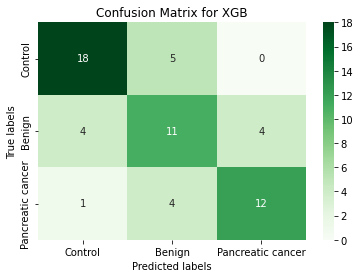

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test2, Y_pred2)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap="Greens")
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix for XGB')
ax.xaxis.set_ticklabels(['Control', 'Benign','Pancreatic cancer']); ax.yaxis.set_ticklabels(['Control', 'Benign','Pancreatic cancer'])
plt.show()

#### Random Forest

In [39]:
# First big sweep
hyperparameters = dict(n_estimators=[1,10,20,30,40,50,60,70,80,90,100], 
                       max_features = ['auto', 'sqrt'], min_samples_split = [2, 5, 10],
                       min_samples_leaf = [1, 2, 4],bootstrap = [True, False])
#Use GridSearch
rf_try = GridSearchCV(RandomForestClassifier(), hyperparameters, cv=10)
#Fit the model
best_model = rf_try.fit(X_train2, y_train2)
'''
'''
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_features:', best_model.best_estimator_.get_params()['max_features'])
print('Best min_samples_split:', best_model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print('Best bootstrap:', best_model.best_estimator_.get_params()['bootstrap'])

Best n_estimators: 40
Best max_features: auto
Best min_samples_split: 10
Best min_samples_leaf: 2
Best bootstrap: True


In [40]:
# Second sweep
hyperparameters_rf = dict(n_estimators=[15,16,17,18,19,20,21,22,23,24,25], min_samples_split = [9, 10,11])
#Use GridSearch
rf_try_2 = GridSearchCV(RandomForestClassifier(max_features = 'auto',min_samples_leaf =  4,bootstrap = True,random_state=1), hyperparameters_rf, cv=10)
#Fit the model
best_model_rf = rf_try_2.fit(X_train2, y_train2)
print('Best n_estimators:', best_model_rf.best_estimator_.get_params()['n_estimators'])
print('Best min_samples_split:', best_model_rf.best_estimator_.get_params()['min_samples_split'])

Best n_estimators: 18
Best min_samples_split: 11


In [41]:
rf_def = RandomForestClassifier(n_estimators= 18, max_features= "auto",min_samples_split= 11, min_samples_leaf= 4,bootstrap= True,random_state=1)
rf_def.fit(X_train2, y_train2)
Y_pred_rf = rf_def.predict(X_test2)
acc_rf_def = round(rf_def.score(X_test2, y_test2) * 100, 2)
scores = cross_val_score(rf_def, X_train2,y_train2, cv=5)
print(scores)
print("Mean accuracy: ",round(np.mean(scores),3))

[0.65420561 0.66037736 0.62264151 0.6509434  0.66981132]
Mean accuracy:  0.652


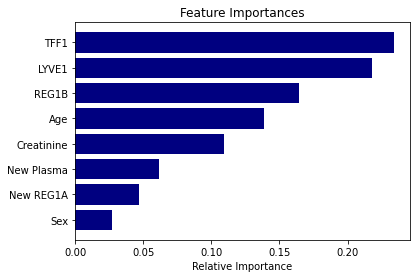

In [42]:
features = ['Age','Sex','Creatinine','LYVE1','REG1B','TFF1','New Plasma','New REG1A'] #Features names
importances = rf_def.feature_importances_ # Impurity-based feature importances
indices = np.argsort(importances) # Put feature with biggest importance at the top
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#000080')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The best method for this first problem is using a **Random Forest classifier**.

### Third trial just clasifying cancer/ no cancer
Now we will just classify between cancer and no cancer.

In [43]:
data_3=data_2.copy()
data_3["diagnosis"]=data_3["diagnosis"].replace(1, 0) # We just keep the classes cancer and no cancer
data_3["diagnosis"]=data_3["diagnosis"].replace(2, 1) # Changing labels for ML --> 1

In [44]:
x3=data_3.drop(['diagnosis'], 1)
y3=data_3['diagnosis']
X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, random_state=1,test_size=0.1)
print("X_train3 shape: {}".format(X_train3.shape))
print("y_train3 shape: {}".format(y_train3.shape))
print("X_test3 shape: {}".format(X_test3.shape))
print("y_test3 shape: {}".format(y_test3.shape))
sc = StandardScaler()
X_train3 = sc.fit_transform(X_train3)
X_test3 = sc.transform(X_test3)

X_train3 shape: (531, 8)
y_train3 shape: (531,)
X_test3 shape: (59, 8)
y_test3 shape: (59,)


We try all the methods at once.

In [45]:
try_all(X_train3,y_train3)

[('SVC', 84.9444542408746),
 ('RF', 83.99576794216188),
 ('KNN', 82.87074590019398),
 ('LR', 82.49162405219538),
 ('XGB', 82.11250220419679),
 ('NB', 78.34597072826661)]

#### Random Forest

In [46]:
hyperparameters = dict(n_estimators=[1,10,20,30,40,50,60,70,80,90,100], 
                       max_features = ['auto', 'sqrt'], min_samples_split = [2, 5, 10],
                       min_samples_leaf = [1, 2, 4],bootstrap = [True, False])
#Use GridSearch
rf_try = GridSearchCV(RandomForestClassifier(random_state=1), hyperparameters, cv=10)
#Fit the model
best_model = rf_try.fit(X_train3, y_train3)
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_features:', best_model.best_estimator_.get_params()['max_features'])
print('Best min_samples_split:', best_model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print('Best bootstrap:', best_model.best_estimator_.get_params()['bootstrap'])

Best n_estimators: 60
Best max_features: auto
Best min_samples_split: 2
Best min_samples_leaf: 1
Best bootstrap: True


[0.8317757  0.83018868 0.86792453 0.83018868 0.82075472]
Mean accuracy:  0.836


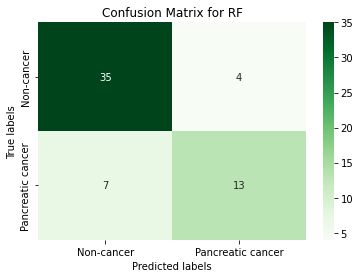

In [47]:
rf_def = RandomForestClassifier(n_estimators=60,max_features="auto",min_samples_split=2,min_samples_leaf=1,bootstrap=True)
rf_def.fit(X_train3, y_train3)
Y_pred = rf_def.predict(X_test3)
acc_rf = round(rf_def.score(X_test3, y_test3) * 100, 2)
scores = cross_val_score(rf_def, X_train3,y_train3, cv=5)
print(scores)
print("Mean accuracy: ",round(np.mean(scores),3))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test3, Y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap="Greens")
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix for RF')
ax.xaxis.set_ticklabels(['Non-cancer','Pancreatic cancer']); ax.yaxis.set_ticklabels(['Non-cancer','Pancreatic cancer'])
plt.show()

#### Support vector classifier

In [48]:
hyperparameters = dict(gamma=['scale', 'auto'],C=[0.1, 1, 10, 100, 1000])
#Use GridSearch
svc_try = GridSearchCV(SVC(), hyperparameters, cv=10)
#Fit the model
best_model = svc_try.fit(X_train3, y_train3)
print('Best gamma:', best_model.best_estimator_.get_params()['gamma'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best gamma: scale
Best C: 10


[0.85046729 0.85849057 0.88679245 0.81132075 0.81132075]
Mean accuracy:  0.844


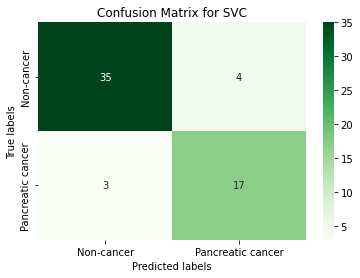

In [49]:
svc_def = SVC(C=10,gamma="scale")
svc_def.fit(X_train3, y_train3)
Y_pred = svc_def.predict(X_test3)
acc_rf = round(svc_def.score(X_test3, y_test3) * 100, 2)
scores = cross_val_score(svc_def, X_train3,y_train3, cv=5)
print(scores)
print("Mean accuracy: ",round(np.mean(scores),3))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test3, Y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap="Greens")
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix for SVC')
ax.xaxis.set_ticklabels(['Non-cancer','Pancreatic cancer']); ax.yaxis.set_ticklabels(['Non-cancer','Pancreatic cancer'])
plt.show()

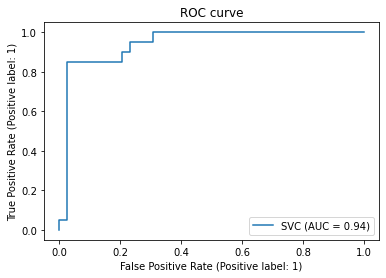

In [50]:
from sklearn import metrics
metrics.plot_roc_curve(svc_def, X_test3, y_test3) 
plt.title("ROC curve")
plt.show()

#### Trying deep learning for binary classification

In [51]:
import tensorflow as tf
import keras

In [52]:
x3_dl=data_3.drop(['diagnosis'], 1)
y3_dl=data_3['diagnosis']
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(x3_dl, y3_dl, random_state=1,test_size=0.08)
print("X_train_dl shape: {}".format(X_train_dl.shape))
print("y_train_dl shape: {}".format(y_train_dl.shape))
print("X_test_dl shape: {}".format(X_test_dl.shape))
print("y_test_dl shape: {}".format(y_test_dl.shape))

X_train_dl shape: (542, 8)
y_train_dl shape: (542,)
X_test_dl shape: (48, 8)
y_test_dl shape: (48,)


Feature scaling for Deep Learning.

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_dl = sc.fit_transform(X_train_dl)
X_test_dl = sc.transform(X_test_dl)

###### Initializing the ANN

In [54]:
ann = tf.keras.models.Sequential()

###### Adding layers to the ANN

In [55]:
ann.add(tf.keras.layers.Dense(units=8, input_dim=8, kernel_initializer='uniform', activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, kernel_initializer='uniform', activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid')) # Output layer

###### Compiling the model

In [56]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

##### Training the ANN on the Training set

In [57]:
# Our ANN model
print(ann.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
hist=ann.fit(X_train_dl, y_train_dl, batch_size = 32, epochs = 500)

Epoch 1/500
17/17 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.6384
Epoch 2/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.6587
Epoch 3/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.6587
Epoch 4/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.6587
Epoch 5/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6530 - accuracy: 0.6716
Epoch 6/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.7325
Epoch 7/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.7934
Epoch 8/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5459 - accuracy: 0.8063
Epoch 9/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.8210
Epoch 10/500
17/17 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.8303
Epoch 11/

17/17 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8561
Epoch 83/500
17/17 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8561
Epoch 84/500
17/17 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8542
Epoch 85/500
17/17 [==============================] - 0s 3ms/step - loss: 0.3389 - accuracy: 0.8542
Epoch 86/500
17/17 [==============================] - 0s 2ms/step - loss: 0.3389 - accuracy: 0.8579
Epoch 87/500
17/17 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.8561
Epoch 88/500
17/17 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.8542
Epoch 89/500
17/17 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.8524
Epoch 90/500
17/17 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8542
Epoch 91/500
17/17 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.8542
Epoch 92/500


17/17 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.8616
Epoch 164/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2936 - accuracy: 0.8616
Epoch 165/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2931 - accuracy: 0.8653
Epoch 166/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2925 - accuracy: 0.8653
Epoch 167/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2928 - accuracy: 0.8653
Epoch 168/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2917 - accuracy: 0.8635
Epoch 169/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2922 - accuracy: 0.8672
Epoch 170/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2914 - accuracy: 0.8690
Epoch 171/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2908 - accuracy: 0.8690
Epoch 172/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2911 - accuracy: 0.8690
Epoc

17/17 [==============================] - 0s 3ms/step - loss: 0.2757 - accuracy: 0.8745
Epoch 245/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2756 - accuracy: 0.8727
Epoch 246/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2758 - accuracy: 0.8745
Epoch 247/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2758 - accuracy: 0.8727
Epoch 248/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2752 - accuracy: 0.8727
Epoch 249/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2754 - accuracy: 0.8745
Epoch 250/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2750 - accuracy: 0.8727
Epoch 251/500
17/17 [==============================] - 0s 1ms/step - loss: 0.2762 - accuracy: 0.8727
Epoch 252/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2746 - accuracy: 0.8727
Epoch 253/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2746 - accuracy: 0.8745
Epoc

17/17 [==============================] - 0s 2ms/step - loss: 0.2612 - accuracy: 0.8801
Epoch 326/500
17/17 [==============================] - 0s 978us/step - loss: 0.2615 - accuracy: 0.8838
Epoch 327/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2602 - accuracy: 0.8893
Epoch 328/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2596 - accuracy: 0.8856
Epoch 329/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2601 - accuracy: 0.8875
Epoch 330/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2597 - accuracy: 0.8856
Epoch 331/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2598 - accuracy: 0.8801
Epoch 332/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2599 - accuracy: 0.8948
Epoch 333/500
17/17 [==============================] - 0s 978us/step - loss: 0.2587 - accuracy: 0.8948
Epoch 334/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2587 - accuracy: 0.8856


17/17 [==============================] - 0s 3ms/step - loss: 0.2468 - accuracy: 0.8967
Epoch 407/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2474 - accuracy: 0.8948
Epoch 408/500
17/17 [==============================] - 0s 1ms/step - loss: 0.2467 - accuracy: 0.8985
Epoch 409/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2465 - accuracy: 0.8967
Epoch 410/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2464 - accuracy: 0.8948
Epoch 411/500
17/17 [==============================] - 0s 974us/step - loss: 0.2465 - accuracy: 0.8948
Epoch 412/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2461 - accuracy: 0.8967
Epoch 413/500
17/17 [==============================] - 0s 3ms/step - loss: 0.2460 - accuracy: 0.8930
Epoch 414/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2456 - accuracy: 0.8948
Epoch 415/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2455 - accuracy: 0.8967
Ep

17/17 [==============================] - 0s 2ms/step - loss: 0.2314 - accuracy: 0.9004
Epoch 488/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2306 - accuracy: 0.9004
Epoch 489/500
17/17 [==============================] - 0s 978us/step - loss: 0.2310 - accuracy: 0.9022
Epoch 490/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2306 - accuracy: 0.9004
Epoch 491/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2303 - accuracy: 0.9004
Epoch 492/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.9004
Epoch 493/500
17/17 [==============================] - 0s 3ms/step - loss: 0.2301 - accuracy: 0.9004
Epoch 494/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2295 - accuracy: 0.9004
Epoch 495/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2295 - accuracy: 0.9004
Epoch 496/500
17/17 [==============================] - 0s 2ms/step - loss: 0.2296 - accuracy: 0.9022
Ep

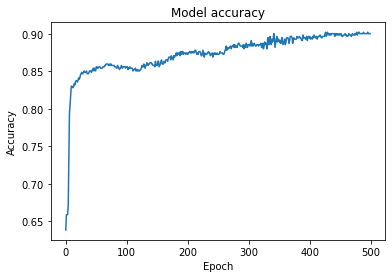

In [59]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

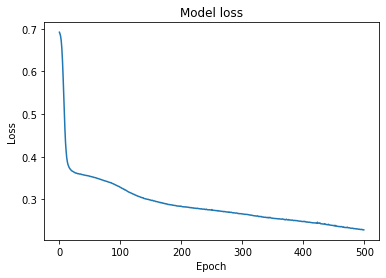

In [60]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

2/2 [==============================] - 0s 16ms/step


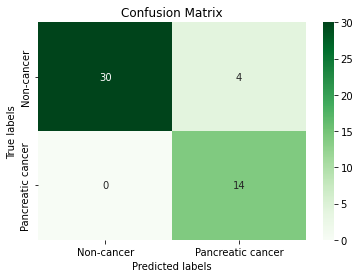

In [61]:
Y_pred_ann  = ann.predict(X_test_dl)
Y_pred_ann=Y_pred_ann.round().astype(int)
cm = confusion_matrix(y_test_dl, Y_pred_ann)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap="Greens")
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-cancer','Pancreatic cancer']); ax.yaxis.set_ticklabels(['Non-cancer','Pancreatic cancer'])
plt.show()

And we perform a KFold for the Deep Learning approach.

In [62]:
from sklearn.model_selection import StratifiedKFold

x3_dl=np.array(x3_dl)
y3_dl=np.array(y3_dl)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
cvscores = []
for train, test in kfold.split(x3_dl, y3_dl):
  # create model
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=8, input_dim=8, kernel_initializer='uniform', activation='relu'))
  ann.add(tf.keras.layers.Dense(units=8, kernel_initializer='uniform', activation='relu'))
  ann.add(tf.keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid')) # Output layer
# Compile model
  ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Fit the model
  ann.fit(x3_dl[train], y3_dl[train], epochs=500, batch_size=32, verbose=0)
# evaluate the model
  scores = ann.evaluate(x3_dl[test], y3_dl[test], verbose=0)
  print( round(scores[1]*100,2)," %")
  cvscores.append(scores[1] * 100)
print("Mean score is: ",round(np.mean(cvscores),2), " %")

79.66  %
83.05  %
81.36  %
79.66  %
83.05  %
Mean score is:  81.36  %


#### Conclusions:

With Deep Learning, due to the lack of data we are not able to improve the 84.4 % accuracy using the SVC algorithm. Therefore, for this case, **SVC** is the selected algorithm to distinguish between patients with and without pancreatic cancer.